# Analysis of Bitcoin and Binancecoin

Diversification of assets is an important part of successful investment management. To some extent, the diversification may be measured by the correlation of assets within the portfolio.  

The purpose of this project is to experiment with this concept in the cryptocurrency market and quantify the correlation between two major currencies, Bitcoin and Binancecoin, and test the feasibility of predictive modeling with machine learning in a highly volatile market. It is intended purely for experimentation and not to be taken as an investment strategy or advice.  

The dataset was obtained from Usama Buttar on Kaggle at the following url:  
https://www.kaggle.com/datasets/usamabuttar/cryptocurrency-historical-prices-updated-daily  

In [1]:
# import libraries
import numpy as np, matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
os.getcwd()
%matplotlib inline

#### Obtaining and cleaning the BNB data

In [2]:
# create new DataFrame object with Binancecoin data
df_BNB = pd.read_csv('BNB_BNB.csv')
df_BNB.shape 

(1991, 7)

In [3]:
# preview first 5 entries
df_BNB.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,2.05314,2.17423,1.89394,1.99077,1.99077,19192200
1,2017-11-10,2.00773,2.06947,1.64478,1.79684,1.79684,11155000
2,2017-11-11,1.78628,1.91775,1.61429,1.67047,1.67047,8178150
3,2017-11-12,1.66889,1.67280,1.46256,1.51969,1.51969,15298700
4,2017-11-13,1.52601,1.73502,1.51760,1.68662,1.68662,12238800


In [4]:
# create new columns for BNB average price and daily change
df_BNB['avg_price'] = (df_BNB['High'] + df_BNB['Low']) / 2 
df_BNB['change'] = (df_BNB['Close'] - df_BNB['Open'])
df_BNB # preview DataFrame

,Date,Open,High,Low,Close,Adj Close,Volume,avg_price,change
0,2017-11-09,2.053140,2.174230,1.893940,1.990770,1.990770,19192200,2.034085,-0.062370
1,2017-11-10,2.007730,2.069470,1.644780,1.796840,1.796840,11155000,1.857125,-0.210890
2,2017-11-11,1.786280,1.917750,1.614290,1.670470,1.670470,8178150,1.766020,-0.115810
3,2017-11-12,1.668890,1.672800,1.462560,1.519690,1.519690,15298700,1.567680,-0.149200
4,2017-11-13,1.526010,1.735020,1.517600,1.686620,1.686620,12238800,1.626310,0.160610
...,...,...,...,...,...,...,...,...,...
1986,2023-04-18,340.044769,346.493042,337.859314,343.193451,343.193451,741280408,342.176178,3.148682
1987,2023-04-19,343.169617,343.529907,321.052032,322.707520,322.707520,826810466,332.290970,-20.462097
1988,2023-04-20,322.587738,326.552521,315.902191,317.889923,317.889923,663981561,321.227356,-4.697815
1989,2023-04-21,317.921112,331.417175,316.116943,321.674988,321.674988,1057530805,323.767059,3.753876


In [5]:
# check for odd datatypes
df_BNB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1991 non-null   object 
 1   Open       1991 non-null   float64
 2   High       1991 non-null   float64
 3   Low        1991 non-null   float64
 4   Close      1991 non-null   float64
 5   Adj Close  1991 non-null   float64
 6   Volume     1991 non-null   int64  
 7   avg_price  1991 non-null   float64
 8   change     1991 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 140.1+ KB


In [6]:
# convert date datatype from object to pd DateTime
df_BNB['Date'] = pd.to_datetime(df_BNB['Date'], format='%Y-%m-%d')

#### Obtaining and cleaning the BTC data

In [7]:
# get bitcoin data
df_BTC = pd.read_csv('BTC_Bitcoin.csv')

In [8]:
# define two new columns with the average daily price and daily change
df_BTC['avg_price'] = (df_BTC['High'] + df_BTC['Low']) / 2
df_BTC['change'] = (df_BTC['Close'] - df_BTC['Open'])
df_BTC.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,avg_price,change
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,460.298004,-8.529999
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,434.981995,-32.419983
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,406.183502,-29.307007
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,406.589493,14.230988
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,402.803497,-9.263977
5,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600,402.022995,3.052002
6,2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500,418.876999,33.698975
7,2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700,428.621994,-12.546021
8,2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400,416.493988,-11.582001
9,2014-09-26,411.428986,414.937988,400.009003,404.424988,404.424988,21460800,407.473495,-7.003998


In [9]:
# preview the last entries of BTC DataFrame
df_BTC.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,avg_price,change
3135,2023-04-18,29449.091797,30470.302734,29154.849609,30397.552734,30397.552734,19480529496,29812.576172,948.460938
3136,2023-04-19,30394.187500,30411.054688,28669.898438,28822.679688,28822.679688,24571565421,29540.476562,-1571.507812
3137,2023-04-20,28823.683594,29076.400391,28037.257812,28245.988281,28245.988281,21340360360,28556.829102,-577.695312
3138,2023-04-21,28249.230469,28349.968750,27177.365234,27276.910156,27276.910156,20759504330,27763.666992,-972.320312
3139,2023-04-22,27274.150391,27385.095703,27175.154297,27338.378906,27338.378906,19185252352,27280.125000,64.228516


In [10]:
# check for odd datatypes
df_BTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3140 non-null   object 
 1   Open       3140 non-null   float64
 2   High       3140 non-null   float64
 3   Low        3140 non-null   float64
 4   Close      3140 non-null   float64
 5   Adj Close  3140 non-null   float64
 6   Volume     3140 non-null   int64  
 7   avg_price  3140 non-null   float64
 8   change     3140 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 220.9+ KB


In [11]:
# replace 'Date' column object with datetime format
df_BTC['Date'] = pd.to_datetime(df_BTC['Date'], format='%Y-%m-%d')

#### Visualizing relative prices  

Because bitcoin and binancecoin are much different in price, in order to view their changes easily on one graph we will normalize the prices to a range between 0 and 100.

In [12]:
# normalization
def norm(x, x_max, x_min): # define min/max normalizing function
    x_norm = ((x - x_min)/(x_max - x_min))*100
    return x_norm

In [13]:
# add columns of normalized average price to bitcoin and then display
df_BTC['norm_price'] = df_BTC['avg_price'].apply(lambda x: norm(x, df_BTC['avg_price'].max(), df_BTC['avg_price'].min()))
df_BTC

,Date,Open,High,Low,Close,Adj Close,Volume,avg_price,change,norm_price
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,460.298004,-8.529999,0.390428
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,434.981995,-32.419983,0.352788
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,406.183502,-29.307007,0.309971
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,406.589493,14.230988,0.310574
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,402.803497,-9.263977,0.304945
...,...,...,...,...,...,...,...,...,...,...
3135,2023-04-18,29449.091797,30470.302734,29154.849609,30397.552734,30397.552734,19480529496,29812.576172,948.460938,44.031424
3136,2023-04-19,30394.187500,30411.054688,28669.898438,28822.679688,28822.679688,24571565421,29540.476562,-1571.507812,43.626866
3137,2023-04-20,28823.683594,29076.400391,28037.257812,28245.988281,28245.988281,21340360360,28556.829102,-577.695312,42.164378
3138,2023-04-21,28249.230469,28349.968750,27177.365234,27276.910156,27276.910156,20759504330,27763.666992,-972.320312,40.985104


In [14]:
# add columns of normalized average price to binancecoin and then display
df_BNB['norm_price'] = df_BNB['avg_price'].apply(lambda x: norm(x, df_BNB['avg_price'].max(), df_BNB['avg_price'].min()))
df_BNB

,Date,Open,High,Low,Close,Adj Close,Volume,avg_price,change,norm_price
0,2017-11-09,2.053140,2.174230,1.893940,1.990770,1.990770,19192200,2.034085,-0.062370,0.075784
1,2017-11-10,2.007730,2.069470,1.644780,1.796840,1.796840,11155000,1.857125,-0.210890,0.048698
2,2017-11-11,1.786280,1.917750,1.614290,1.670470,1.670470,8178150,1.766020,-0.115810,0.034752
3,2017-11-12,1.668890,1.672800,1.462560,1.519690,1.519690,15298700,1.567680,-0.149200,0.004393
4,2017-11-13,1.526010,1.735020,1.517600,1.686620,1.686620,12238800,1.626310,0.160610,0.013367
...,...,...,...,...,...,...,...,...,...,...
1986,2023-04-18,340.044769,346.493042,337.859314,343.193451,343.193451,741280408,342.176178,3.148682,52.140380
1987,2023-04-19,343.169617,343.529907,321.052032,322.707520,322.707520,826810466,332.290970,-20.462097,50.627279
1988,2023-04-20,322.587738,326.552521,315.902191,317.889923,317.889923,663981561,321.227356,-4.697815,48.933803
1989,2023-04-21,317.921112,331.417175,316.116943,321.674988,321.674988,1057530805,323.767059,3.753876,49.322548


In [15]:
# change the default column to 'Date'
df_BNB.index = df_BNB['Date']

Next, remove all the rows from BTC values that correspond to dates before BNB existed. This data is irrelevant.

In [16]:
# Create new DataFrame with only the prices of bitcoin from after November 9 2017
BTC = df_BTC.loc[(df_BTC['Date'] >= '2017-11-09')]
BTC

,Date,Open,High,Low,Close,Adj Close,Volume,avg_price,change,norm_price
1149,2017-11-09,7446.830078,7446.830078,7101.520020,7143.580078,7143.580078,3226249984,7274.175049,-303.250000,10.521307
1150,2017-11-10,7173.729980,7312.000000,6436.870117,6618.140137,6618.140137,5208249856,6874.435059,-555.589844,9.926973
1151,2017-11-11,6618.609863,6873.149902,6204.220215,6357.600098,6357.600098,4908680192,6538.685059,-261.009766,9.427780
1152,2017-11-12,6295.450195,6625.049805,5519.009766,5950.069824,5950.069824,8957349888,6072.029785,-345.380371,8.733956
1153,2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,6559.490234,6263249920,6327.739990,621.240234,9.114147
...,...,...,...,...,...,...,...,...,...,...
3135,2023-04-18,29449.091797,30470.302734,29154.849609,30397.552734,30397.552734,19480529496,29812.576172,948.460938,44.031424
3136,2023-04-19,30394.187500,30411.054688,28669.898438,28822.679688,28822.679688,24571565421,29540.476562,-1571.507812,43.626866
3137,2023-04-20,28823.683594,29076.400391,28037.257812,28245.988281,28245.988281,21340360360,28556.829102,-577.695312,42.164378
3138,2023-04-21,28249.230469,28349.968750,27177.365234,27276.910156,27276.910156,20759504330,27763.666992,-972.320312,40.985104


In [17]:
# reset the index to count from 0 and replace default index with date
# BTC.reset_index(inplace=True)
BTC.index = BTC['Date']
BTC

,Date,Open,High,Low,Close,Adj Close,Volume,avg_price,change,norm_price
Date,,,,,,,,,,
2017-11-09,2017-11-09,7446.830078,7446.830078,7101.520020,7143.580078,7143.580078,3226249984,7274.175049,-303.250000,10.521307
2017-11-10,2017-11-10,7173.729980,7312.000000,6436.870117,6618.140137,6618.140137,5208249856,6874.435059,-555.589844,9.926973
2017-11-11,2017-11-11,6618.609863,6873.149902,6204.220215,6357.600098,6357.600098,4908680192,6538.685059,-261.009766,9.427780
2017-11-12,2017-11-12,6295.450195,6625.049805,5519.009766,5950.069824,5950.069824,8957349888,6072.029785,-345.380371,8.733956
2017-11-13,2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,6559.490234,6263249920,6327.739990,621.240234,9.114147
...,...,...,...,...,...,...,...,...,...,...
2023-04-18,2023-04-18,29449.091797,30470.302734,29154.849609,30397.552734,30397.552734,19480529496,29812.576172,948.460938,44.031424
2023-04-19,2023-04-19,30394.187500,30411.054688,28669.898438,28822.679688,28822.679688,24571565421,29540.476562,-1571.507812,43.626866
2023-04-20,2023-04-20,28823.683594,29076.400391,28037.257812,28245.988281,28245.988281,21340360360,28556.829102,-577.695312,42.164378


#### Results
Plot the normalized average daily prices on a line graph to visualize them.

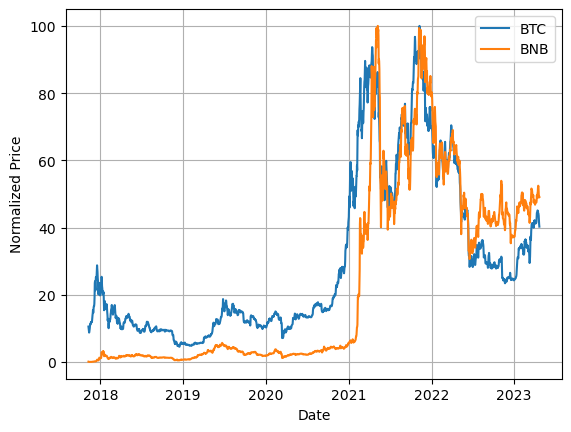

In [18]:
# create plot 
plt.figure()
sns.lineplot(BTC['norm_price'], label='BTC')
sns.lineplot(df_BNB['norm_price'], label='BNB')
plt.ylabel("Normalized Price")
plt.grid()
plt.legend()
plt.show()

Now we can see the relative changes in price over both histories. It is clear that we can expect some form of correlation between the two. Some interesting features to note are the apparent lag in price jump of BNB behind BTC at the start of 2021, and from mid 2022 onward BNB seems to have performed better than BTC.

#### Set up the correlation calculation

The next step is to make a new DataFrame with two columns, one for each currency change and then call the ```.corr()``` method to determine correlation.

In [19]:
# create the new DataFrame
price_changes = BTC[['change']].copy() # create new df
price_changes['BNB_change'] = df_BNB['change'].copy() # add column to new df
price_changes.rename(columns={'change': 'BTC_change'}, inplace=True) # rename column
price_changes['BTC_price'] = BTC[['avg_price']].copy()
price_changes['BNB_price'] = df_BNB[['avg_price']].copy()
price_changes.index = BTC['Date'] # change the index to the date

Check for any null entries.

In [20]:
# compute sum of null entries in either column
print(price_changes['BNB_change'].isna().sum(),',', price_changes['BTC_change'].isna().sum())

0 , 0


In [21]:
# display preview of new df
price_changes

,BTC_change,BNB_change,BTC_price,BNB_price
Date,,,,
2017-11-09,-303.250000,-0.062370,7274.175049,2.034085
2017-11-10,-555.589844,-0.210890,6874.435059,1.857125
2017-11-11,-261.009766,-0.115810,6538.685059,1.766020
2017-11-12,-345.380371,-0.149200,6072.029785,1.567680
2017-11-13,621.240234,0.160610,6327.739990,1.626310
...,...,...,...,...
2023-04-18,948.460938,3.148682,29812.576172,342.176178
2023-04-19,-1571.507812,-20.462097,29540.476562,332.290970
2023-04-20,-577.695312,-4.697815,28556.829102,321.227356


Now that the data is ready, call the ```.corr()``` method to compute the correlation matrix.

In [22]:
# compute correlation matrix
price_changes.corr(numeric_only=False)

,BTC_change,BNB_change,BTC_price,BNB_price
BTC_change,1.000000,0.655376,-0.003440,-0.049280
BNB_change,0.655376,1.000000,0.036382,-0.002126
BTC_price,-0.003440,0.036382,1.000000,0.883330
BNB_price,-0.049280,-0.002126,0.883330,1.000000


#### Interpreting the results

The important results of this symmetric matrix are the off-diagonal entries. The computed values of 0.655376 and 0.88330 indicate a  positive correlation, which means that when Bitcoin increases or decreases, Binancecoin tends to do the exact same thing. A cutoff value of 0.7 or greater is generally considered a strong correlation. The values along the main diagonal are the correlation of each asset with itself, which is of course perfect. The values from a correlation matrix range from -1 to +1, with -1 meaning that when one increases, the other decreases. Values near zero indicate no correlation.  

As indicated from the normalized price plot earlier, these two assets are highly correlated and it is likely that their prices are more reflective of the cryptocurrency market performance as a whole rather than individual characteristics. 

It is important to keep in mind that correlation coefficients can be dynamic and should not be assumed to remain constant over time.

____
## Employing a machine learning model

The next section we train a supervised model on the dataset to evaluate its performance on predicting prices of BNB based on the performance of BTC. Because this is a regression problem, the model chosen is Random Forest Regressor from ```sklearn```.  
Some other models such as SVR are also candidates for this type of problem but in this case RFR is chosen because it tends to have better protection from overfitting and is not easily thrown off by features data with different scales.

In [23]:
# import modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from mpl_toolkits import mplot3d
from sklearn.ensemble import RandomForestRegressor

### Preprocessing 
Processing the data into a suitable form for the regression model.

In [24]:
# create new df for modeling
model_data = price_changes[['BTC_price']].copy()
model_data['BNB_price'] = price_changes['BNB_price'].copy()
model_data.reset_index(inplace=True)
model_data['timestep'] = model_data.index.values

The next step is to select a date between 2017-11-09 and 2023-4-22 to determine how far back to train the model. To try to minimize potential for overfitting, just values after Jan 1 2022 are chosen.

In [25]:
# select cutoff date for modeling data
date = pd.to_datetime('2022-1-01')
model_data = model_data[model_data['Date'] >= date]
model_data.reset_index(inplace=True)
model_data['timestep'] = model_data.index.values
model_data.head()

,index,Date,BTC_price,BNB_price,timestep
0,1514,2022-01-01,47057.898438,519.628128,0
1,1515,2022-01-02,47369.171875,526.062286,1
2,1516,2022-01-03,46673.345703,521.373871,2
3,1517,2022-01-04,46579.505859,511.458511,3
4,1518,2022-01-05,44863.634766,488.648376,4


In a regression model, the goal is to provide the best fit line through the parameter space. In this case it is helpful to visualize it on a scatterplot. 

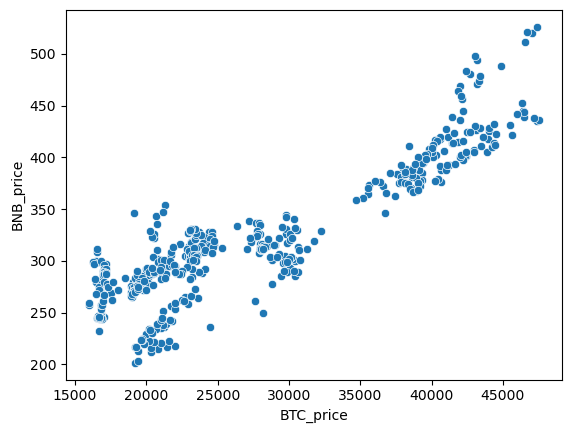

In [26]:
# create a scatterplot of the data
plt.figure()
sns.scatterplot(data=model_data, x='BTC_price', y='BNB_price')
plt.show()

The data is nonlinear and will be hard to model without losing finer patterns of the data in the lower and upper parts of the graph. Because of this, we will augment the data by adding an additional feature of time to make a 3d projection and clarify some features.

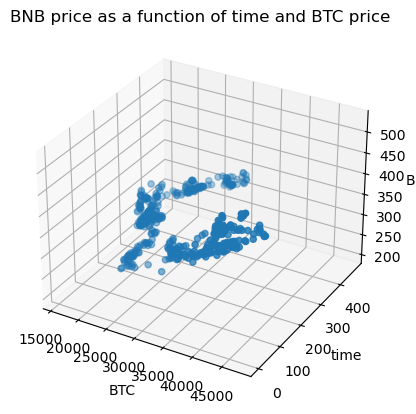

In [27]:
# create 3d plot
# %matplotlib qt
plot = plt.figure().add_subplot(projection='3d')
plot.scatter(model_data['BTC_price'], model_data['timestep'], model_data['BNB_price'])
plt.xlabel('BTC')
plt.ylabel('time')
plot.set_zlabel('BNB')
plt.title('BNB price as a function of time and BTC price');

The 3d graph spreads the data out and will be easier for the regression model to recognize patterns.

The next step is to split the data into testing and training sections. This can also be done using the ```test_train_split``` function of ```sklearn``` but in this case it is done manually.

In [28]:
# manually create training and testing data
training_percent = 0.75
X_train = model_data.loc[model_data.index <= model_data.index.max()*training_percent, ['BTC_price', 'timestep']]
X_test = model_data.loc[model_data.index >= model_data.index.max()*training_percent, ['BTC_price', 'timestep']]
y_train = model_data.loc[model_data.index <= model_data.index.max()*training_percent, ['BNB_price']]
y_test = model_data.loc[model_data.index >= model_data.index.max()*training_percent, ['BNB_price']]

Check the shapes of the newly formed datasets.

In [29]:
print(f'X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}')

X_train: (358, 2), X_test: (120, 2), y_train: (358, 1), y_test: (120, 1)


For other regression models such as SVR, it is important to scale the data but for this Random Forest model, the data does not need to be scaled.

___  
### Training and predictions
There are now four data sets. ```X_train``` is the array of values of BTC for training and ```y_train``` is the array of BNB values for training. ```X_test``` and ```y_test``` are the remaining arrays that will not be seen by the model during fitting and thus may be used to evaluate the model's predictive performance.  
The next step is to select hyperparameters and train the model.

In [30]:
# initialize the model with no hyperparameters
model = RandomForestRegressor()

RandomForestRegressor hyperparameters:  
* n_estimators: number of 'trees' in the forest. default=100  
* max_features: default=1.0, int or float
* min_samples_split: min samples required to split a node. default=2
* max_depth: maximum depth of the tree. default=None 
* min_samples_leaf: min samples required to be at a leaf node. default=10


Find the optimal hyperparameters using a grid search.

In [31]:
# perform grid search - RandomForestRegressor
parameters = {'n_estimators': [50], \
              'max_features':[2],\
              'min_samples_split': [2],\
              'max_depth': [8],\
              'min_samples_leaf': [10]}
clf = GridSearchCV(model, parameters, scoring='neg_mean_absolute_percentage_error')
clf.fit(X_train['BTC_price'].values.reshape(-1,1), y_train.values.reshape(y_train.size))
params = clf.best_params_
print(f'The optimal hyperparameters are: {params}')

The optimal hyperparameters are: {'max_depth': 8, 'max_features': 2, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 50}


Define and run the model with optimized hyperparameters.

In [32]:
# reinitialize RFR model
model = RandomForestRegressor(n_estimators=params['n_estimators'], max_features=params['max_features'],\
                             min_samples_split=params['min_samples_split'], max_depth=params['max_depth'],\
                              min_samples_leaf=params['min_samples_leaf'], \
                             random_state=0)

model.fit(X_train, y_train.values.reshape(y_train.size)) # train the model

RandomForestRegressor(max_depth=8, max_features=2, min_samples_leaf=10,
                      n_estimators=50, random_state=0)

Now that the model is trained, the next step is to make predictions and test their accuracy.

In [33]:
# use model to make predictions
y_test_pred = model.predict(X_test).reshape(-1,1) # prediction based on test data
y_train_pred = model.predict(X_train).reshape(-1,1) # prediction based on training data

___
### Results   

#### Evaluating predictions

In [34]:
# display characteristics of the predicted values
print('The range of predicted values is', y_test_pred.max() - y_test_pred.min())
print('The max predicted value is', y_test_pred.max())

The range of predicted values is 54.5373773497879
The max predicted value is 312.5830175896288


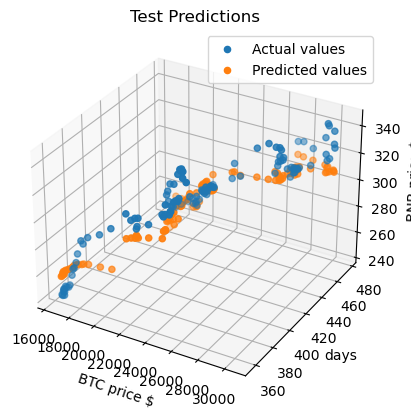

In [35]:
# plot prediction of testing data
plot = plt.figure().add_subplot(projection='3d')
plot.scatter(X_test['BTC_price'], X_test['timestep'], y_test['BNB_price'], label='Actual values')
plot.scatter(X_test['BTC_price'], X_test['timestep'], y_test_pred, label='Predicted values')
plt.title('Test Predictions')
plt.xlabel('BTC price $')
plt.ylabel('days')
plot.set_zlabel('BNB price $');
plt.legend();

The relationship is difficult to see with this inline view, so we create a lineplot. In order to evaluate the model's performance on both the training set and the testing set, we will create and compare plots of both. This is helpful to diagnose potential model overfitting.

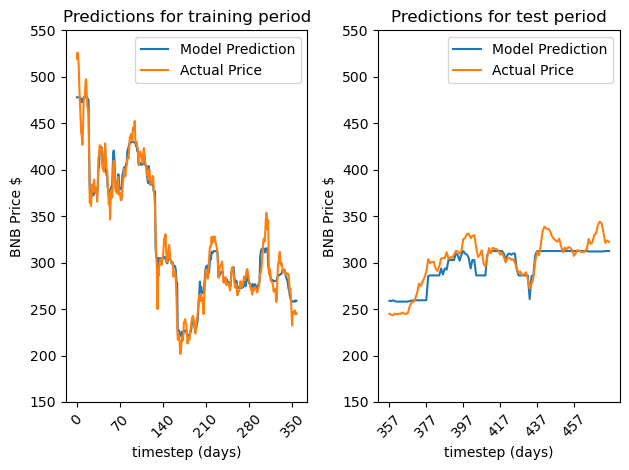

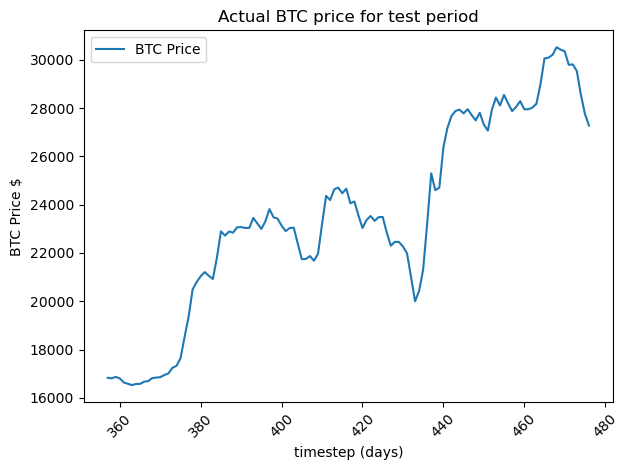

In [36]:
# create lineplot of predictions on training data
plt.subplot(1,2,1)
sns.lineplot(x=X_train['timestep'], y=y_train_pred.reshape(len(y_train_pred)), label='Model Prediction')
sns.lineplot(x=X_train['timestep'], y=y_train['BNB_price'], label='Actual Price')
plt.xlabel('timestep (days)')
plt.ylabel('BNB Price $')
plt.yticks(range(150,600, 50))
plt.title("Predictions for training period")
plt.xticks(range(X_train['timestep'].min(), X_train['timestep'].max(), 70))
plt.xticks(rotation=45)

# create lineplot of predictions on test data
plt.subplot(1,2,2)
sns.lineplot(x=X_test['timestep'], y=y_test_pred.reshape(len(y_test_pred)), label='Model Prediction')
sns.lineplot(x=X_test['timestep'], y=y_test['BNB_price'], label='Actual Price')
plt.title("Predictions for test period")
plt.xlabel('timestep (days)')
plt.ylabel("BNB Price $")
plt.xticks(range(X_test['timestep'].min(), X_test['timestep'].max(), 20))
plt.xticks(rotation=45)
plt.yticks(range(150,600, 50))
plt.tight_layout()


# create lineplot of actual BTC prices during testing data
plt.figure()
sns.lineplot(x=X_test['timestep'], y=X_test['BTC_price'], label='BTC Price')
plt.xlabel('timestep (days)')
plt.ylabel('BTC Price $')
plt.title("Actual BTC price for test period")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Accuracy score

In [37]:
# accuracy metrics
test_mape = mean_absolute_percentage_error(y_test['BNB_price'].values, y_test_pred)
train_mape = mean_absolute_percentage_error(y_train['BNB_price'].values, y_train_pred)
print(f'The mean absolute percent error on testing data is {test_mape}')
print(f'The mean absolute percent error on training data is {train_mape}')

The mean absolute percent error on testing data is 0.03503745938679417
The mean absolute percent error on training data is 0.026543109217578367


#### Discussion
The model predicts the price of BNB with a mean absolute percent error of around 0.035. It performs significantly better on the training dataset than the testing set, and notably performs well near the first testing values but then becomes constant. These are symptoms of model overfitting, so the next step is to perform new hyperparameter searches for fine tuning. It is also possible that finer patterns in the data are not picked up with the chosen training set of 350 days, so adjusting the date parameter to create a larger dataset may also be beneficial.